1) Summary of meta data

This is a trans-national data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

* Data Set Characteristics:  Multivariate, Sequential,Time-Series
* Number of Instances:541909
* Number of Attributes: 8
* Area: Business

Attribute Information:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.




In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta as rd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install monthdelta
from monthdelta import monthdelta as md

  Created wheel for monthdelta: filename=MonthDelta-0.9.1-py3-none-any.whl size=3110 sha256=6b842d28832683cd81415a9e1873b4096ec6bf326c4defa0667d0fd87de54a76
  Stored in directory: /root/.cache/pip/wheels/61/94/6f/e277ea10ac45aff06b5ecd49b1c41b4b6ecd1ad832d638c417
Successfully built monthdelta


In [2]:
df=pd.read_excel("Online Retail.xlsx")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0


# Pre-Processing

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.dropna(subset=['CustomerID'], inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0


In [6]:
df=df[(df['Quantity']>0)& (df['CustomerID']>0) & (df['UnitPrice']>0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# 2) Select Transactions from 1/4/2011 and 9/12/2011

In [8]:
df = df.loc[(df['InvoiceDate'] >= '2011-04-01') & (df['InvoiceDate'] < '2011-12-09')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01,1.65,18161.0
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01,1.65,18161.0
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01,0.85,18161.0
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01,9.95,18161.0
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01,2.55,18161.0
...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08,0.79,12748.0
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08,1.25,12748.0
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08,9.95,12748.0
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08,2.08,12748.0


# 3) Calculate the RFM score

In [9]:
df['Price']=df['Quantity']*df['UnitPrice']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Price
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01,1.65,18161.0,16.5
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01,1.65,18161.0,19.8
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01,0.85,18161.0,10.2
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01,9.95,18161.0,19.9
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01,2.55,18161.0,15.3


In [10]:
df=df.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'Price': lambda x:x.sum()}).reset_index()
df


,InvoiceNo,InvoiceDate,CustomerID,Price
0,548550,2011-04-01,18161.0,244.79
1,548551,2011-04-01,14886.0,364.80
2,548552,2011-04-01,17613.0,239.75
3,548553,2011-04-01,12523.0,138.75
4,548554,2011-04-01,13694.0,888.20
...,...,...,...,...
13781,581469,2011-12-08,14606.0,125.65
13782,581471,2011-12-08,14702.0,199.29
13783,581472,2011-12-08,15796.0,447.65
13784,581473,2011-12-08,12748.0,96.89


In [11]:
now = df['InvoiceDate'].max()
now

Timestamp('2011-12-08 00:00:00')

In [12]:
period=12

In [13]:
df['OrdersSincePurchase'] = df['InvoiceDate'].apply(lambda x:(now-x).days/30 )
df['OrdersSincePurchase'].max()
df['OrdersSincePurchase'] = df['OrdersSincePurchase'].astype(int)
df


,InvoiceNo,InvoiceDate,CustomerID,Price,OrdersSincePurchase
0,548550,2011-04-01,18161.0,244.79,8
1,548551,2011-04-01,14886.0,364.80,8
2,548552,2011-04-01,17613.0,239.75,8
3,548553,2011-04-01,12523.0,138.75,8
4,548554,2011-04-01,13694.0,888.20,8
...,...,...,...,...,...
13781,581469,2011-12-08,14606.0,125.65,0
13782,581471,2011-12-08,14702.0,199.29,0
13783,581472,2011-12-08,15796.0,447.65,0
13784,581473,2011-12-08,12748.0,96.89,0


In [14]:
aggr={
    
    'OrdersSincePurchase' : lambda x:x.min(),
     'InvoiceNo' : lambda x:x.count()                            
}
#len([d for d in x if d >= now - rd(months=period)]


In [15]:
rfm = df.groupby(['CustomerID']).agg(aggr).reset_index()
rfm=rfm.rename(columns={'OrdersSincePurchase':'Recency', 'InvoiceNo':'Frequency'})
rfm.head(20)

,CustomerID,Recency,Frequency
0,12347.0,0,5
1,12348.0,2,2
2,12349.0,0,1
3,12352.0,1,3
4,12353.0,6,1
5,12354.0,7,1
6,12355.0,7,1
7,12356.0,0,2
8,12357.0,1,1
9,12358.0,0,2


In [16]:
rfm['Monetary'] = rfm['CustomerID'].apply(lambda x: df[(df['CustomerID'] == x) & \
                                                           (df['InvoiceDate'] >= now - md(months=period))]\
                                                           ['Price'].sum())
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,0,5,3122.82
1,12348.0,2,2,677.00
2,12349.0,0,1,1757.55
3,12352.0,1,3,944.23
4,12353.0,6,1,89.00


In [17]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 5.0},
 'Monetary': {0.2: 243.554,
  0.4: 459.1060000000001,
  0.6: 867.8340000000001,
  0.8: 1776.5880000000004},
 'Recency': {0.2: 0.0, 0.4: 0.0, 0.6: 1.0, 0.8: 3.0}}

In [18]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [19]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [20]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,12347.0,0,5,3122.82,5,4,5,545
1,12348.0,2,2,677.00,2,2,3,223
2,12349.0,0,1,1757.55,5,1,4,514
3,12352.0,1,3,944.23,3,3,4,334
4,12353.0,6,1,89.00,1,1,1,111


# 4)Using elbow method to find k

In [21]:
x = pd.DataFrame([rfm.R, rfm.F, rfm.M]).transpose()
x

,R,F,M
0,5,4,5
1,2,2,3
2,5,1,4
3,3,3,4
4,1,1,1
...,...,...,...
3843,2,1,1
3844,1,1,1
3845,5,2,1
3846,5,5,5


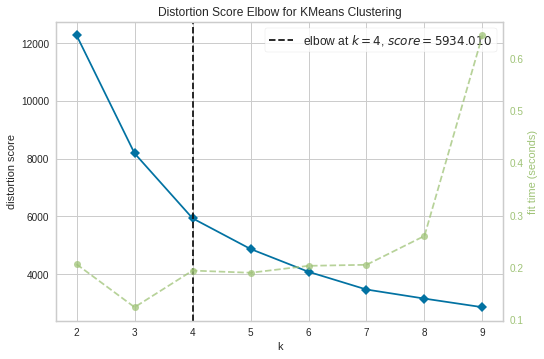

In [22]:
from sklearn.cluster import KMeans

wcss =[]

for i in range(2,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3848,n_init=10,random_state=101)
  kmeans.fit_predict(x)
  wcss.append(kmeans.inertia_)

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x)
visu.show();




Therefore the number of ideal clusters if 4, as the curve breaks at x=4

# 5)Create customer segments using k-means algorithm

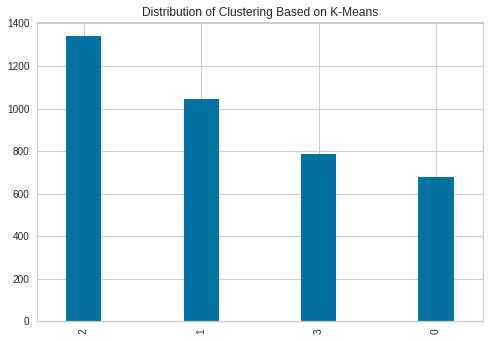

In [23]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=3848, random_state=101 )
y_kmeans = kmeans.fit_predict(x);

centers=kmeans.cluster_centers_

x['Kmeans_Label_ID']=y_kmeans
x.Kmeans_Label_ID.value_counts().plot.bar(width=0.3)
plt.title('Distribution of Clustering Based on K-Means');

# 6) Cluster plotting and segmentation

Text(0.5, 0, 'Monetary')

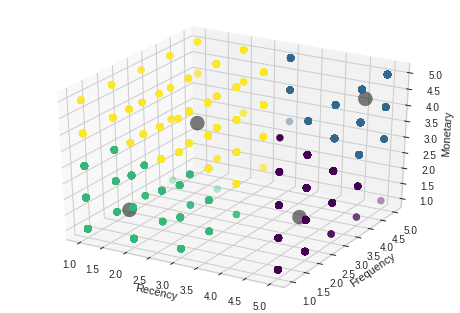

In [24]:

ax = plt.axes(projection ="3d")
ax.scatter3D(x['R'], x['F'],x['M'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], c='black', s=200, alpha=0.5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 7) Print cluster centers and explain

Text(0.5, 0, 'Monetary')

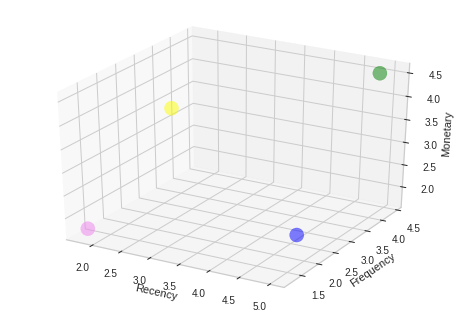

In [25]:
ax = plt.axes(projection ="3d")

ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], c=['blue','green','violet','yellow'], s=200, alpha=0.5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')



*   Cluster 1(green):- Customers of this part of the cluster are completely 
opposite to that of the cluster 3. They are the most active with high R, M and F scores.
*   Cluster 2(blue):- These are the customers, who have recenty made a purchase, They are also quite freqent in purchases, but they are very cautious with spending money.
*   Cluster 3(purple):- Customers of this part of the cluster indicate the inactive buyers. Recency of purchase, frequency of purchase and amont of money spent is very low.
*   Cluster 4(yellow):- These customers are the ones who purchase quite frequently and also spend a lot of money, but recently haven't made a purchase


# 8) Create customer segments using agglomerative clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

ac4 = AgglomerativeClustering(n_clusters = 4)
y_ac4=ac4.fit_predict(x)


Text(0.5, 1.0, 'Distribution of Clustering Based on Agglomerative Clustering')

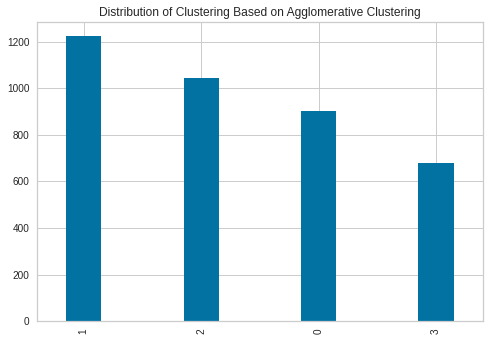

In [27]:
del x['Kmeans_Label_ID']
x['AC4_Label_ID']=y_ac4
x['AC4_Label_ID'].value_counts().plot.bar(width=0.3)
plt.title('Distribution of Clustering Based on Agglomerative Clustering')

# 9)Visualize the segments using dendogram

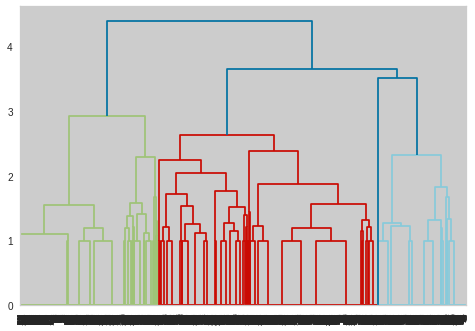

In [28]:
import scipy.cluster.hierarchy as sch
del x['AC4_Label_ID']
dendrogram = sch.dendrogram(sch.linkage(x, method='average'))

# 10) Visualize the clusters from 2 techniques

K-means clustering

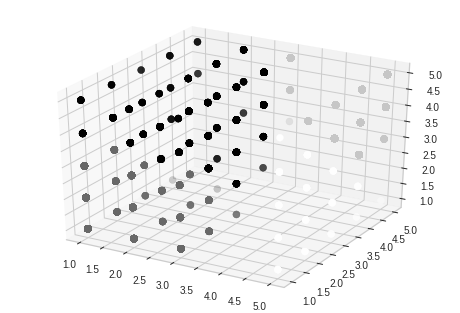

In [31]:
ax_1=plt.axes(projection = "3d")
ax_1.scatter3D(x['R'], x['F'], x['M'], c=y_kmeans, s=50 )
plt.show()

Agglomerative Clustering

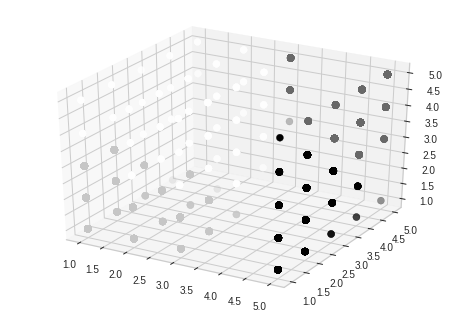

In [30]:

ax_2=plt.axes(projection = "3d")
ax_2.scatter3D(x['R'], x['F'], x['M'], c=y_ac4, s=50 )
plt.show()
